In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy

In [28]:
df=pd.read_csv("nftmusic_rarity.csv")

In [29]:
df.head()

,nft_id,contract_address,description,name,image_url,attributes,transfer_activity,Track,Music,production,Duration,audiolicense,series,Total_supply,rarityRank
0,solana.14sWq4NtZoYWxBNwELLnQSqSy5Tw2M3E2CMfzma...,14sWq4NtZoYWxBNwELLnQSqSy5Tw2M3E2CMfzmaJKJQy,The original Blockbeats Volume 1 metatracks.,Solana Days #005,https://cdn.simplehash.com/assets/9bab67cdf597...,"[{'trait_type': 'Track', 'value': 'Solana Days...",3,Solana Days,Scott Manson,Blockbeats,2:45,Universal,Volume 1,420,9.0
1,solana.1W4E3SE9LzwwCx7wt3vs4zw6t1NrwK71QSrCqdt...,1W4E3SE9LzwwCx7wt3vs4zw6t1NrwK71QSrCqdta5Pv,The original Blockbeats Volume 1 metatracks.,Solana Days #357,https://cdn.simplehash.com/assets/9bab67cdf597...,"[{'trait_type': 'Track', 'value': 'Solana Days...",10,Solana Days,Scott Manson,Blockbeats,2:45,Universal,Volume 1,420,9.0
2,solana.22mi9UbCBi2zry125EEabpLyWYkDzsAF7Y6bgkU...,22mi9UbCBi2zry125EEabpLyWYkDzsAF7Y6bgkUnwCkm,The original Blockbeats Volume 1 metatracks.,Solana Days #160,https://cdn.simplehash.com/assets/9bab67cdf597...,"[{'trait_type': 'Track', 'value': 'Solana Days...",1,Solana Days,Scott Manson,Blockbeats,2:45,Universal,Volume 1,420,9.0
3,solana.24tFtT7PdQKY2G7pEmD5oCmCbVzUntZudbLzkCH...,24tFtT7PdQKY2G7pEmD5oCmCbVzUntZudbLzkCH4kDob,The original Blockbeats Volume 1 metatracks.,Solana Days #217,https://cdn.simplehash.com/assets/9bab67cdf597...,"[{'trait_type': 'Track', 'value': 'Solana Days...",2,Solana Days,Scott Manson,Blockbeats,2:45,Universal,Volume 1,420,9.0
4,solana.28fDVugFLz9UUeAzpi7zSAvRaf27Wj3MiRkSV21...,28fDVugFLz9UUeAzpi7zSAvRaf27Wj3MiRkSV21Zh3iG,The original Blockbeats Volume 1 metatracks.,Solana Days #212,https://cdn.simplehash.com/assets/9bab67cdf597...,"[{'trait_type': 'Track', 'value': 'Solana Days...",1,Solana Days,Scott Manson,Blockbeats,2:45,Universal,Volume 1,420,9.0


In [31]:
df.columns

Index(['nft_id', 'contract_address', 'description', 'name', 'image_url',
       'attributes', 'transfer_activity', 'Track', 'Music', 'production',
       'Duration', 'audiolicense', 'series', 'Total_supply', 'rarityRank'],
      dtype='object')

In [32]:
df.drop(columns=['nft_id','contract_address','attributes','production','audiolicense','series','Total_supply','image_url'],inplace=True)

In [33]:
df.columns

Index(['description', 'name', 'transfer_activity', 'Track', 'Music',
       'Duration', 'rarityRank'],
      dtype='object')

In [34]:
df.drop(columns=['description'],inplace=True)

In [35]:
l=[]
for i in range(len(df['Duration'])):
    t=df['Duration'][i]
    time=((int(t[0])*60)+(int(t[2])*10)+(int(t[3])*1))
    l.append(time)
print(l)

[165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165,

In [36]:
df['time']=l
df.drop(columns=['Duration'],inplace=True
       )

In [44]:
px.box(data_frame=df,y='Track',color='rarityRank')

In [45]:
x=list(df.corr().columns)
y=list(df.corr().index)
values=np.array(df.corr().values)
fig = go.Figure(data=go.Heatmap(
    z=values,
    x=x,
    y=y,
                   
    
                   hoverongaps = False))
fig.show()

C:\Users\yasha\AppData\Local\Temp\ipykernel_18076\2943259797.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\yasha\AppData\Local\Temp\ipykernel_18076\2943259797.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\yasha\AppData\Local\Temp\ipykernel_18076\2943259797.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [47]:
dic={}
dic2={}
df2=pd.read_csv("nftmusic_rarity.csv")
for c in df.columns:
    dic[c]=len([*set(df[c].values)])
for c in df2.columns:
    dic2[c]=len([*set(df2[c].values)])
dic

{'name': 1147,
 'transfer_activity': 19,
 'Track': 12,
 'Music': 8,
 'rarityRank': 9,
 'time': 12}

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
df['Track']=le.fit_transform(df.Track)
df['Music']=le.fit_transform(df.Music)

In [51]:
def find_word(word,words):
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True)
    return words[t[0][1]]

In [66]:
from sklearn.cluster import KMeans

In [67]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(df[df.drop(columns=['name']).columns])

KMeans(n_clusters=2, random_state=0)

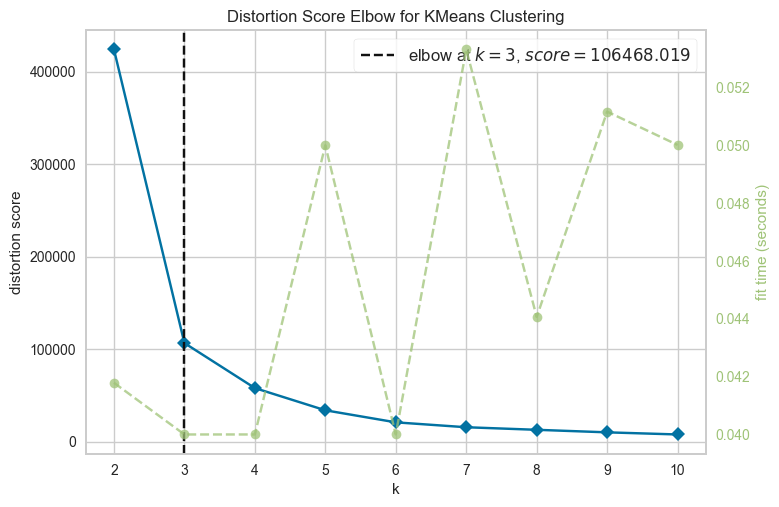

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn import cluster
model = KElbowVisualizer(kmeans, k=10)
model.fit(df[df.drop(columns=['name']).columns])
model.show()


D:\Strawhats\Model\project\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

D:\Strawhats\Model\project\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



KElbowVisualizer(ax=<AxesSubplot: >,
                 estimator=KMeans(n_clusters=3, random_state=0), k=3)

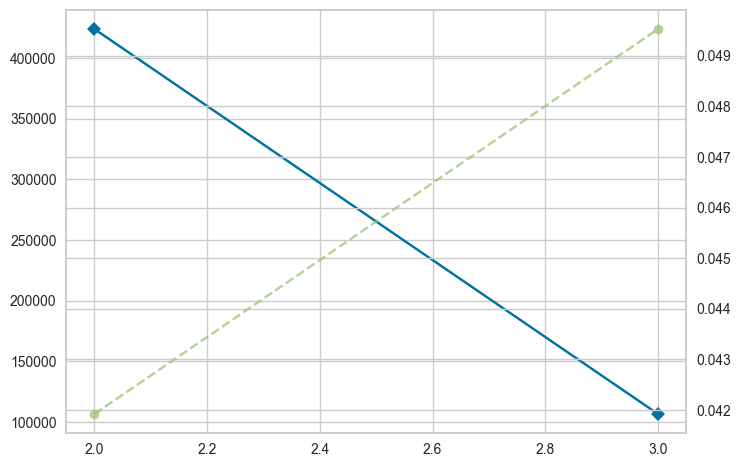

In [69]:
model = KElbowVisualizer(kmeans, k=3)
model.fit(df[df.drop(columns=['name']).columns])

In [70]:
wss=[]
K=range(1,20)
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df[df.drop(columns=['name']).columns])
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)

In [71]:
centers=pd.DataFrame({'Clusters':K,'Distortion':wss})
centers

,Clusters,Distortion
0,1,1.165460e+07
1,2,4.240089e+05
2,3,1.064680e+05
3,4,5.778380e+04
4,5,3.375771e+04
5,6,2.072248e+04
6,7,1.542087e+04
7,8,1.265161e+04
8,9,9.905379e+03
9,10,7.309488e+03


<AxesSubplot: xlabel='Clusters', ylabel='Distortion'>

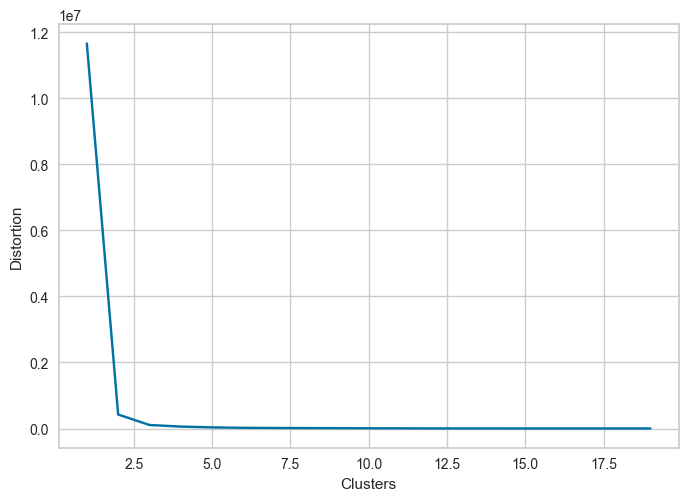

In [72]:
sns.lineplot(x='Clusters',y='Distortion',data=centers)

In [73]:
# Making a weight matrix using euclidean distance
def make_mat(df,x):
    print(x)
    cluster=model.predict(x)
    print(cluster[0])
    points=get_points(cluster[0])
    tk=df['Track'].values
    mc=df['Music'].values
    tm=df['time'].values
    
    cp=df.iloc[points]
    cp=cp.fillna(df.mean())
    song_names=cp['name'].values
    p=[]
    
    k=set(df.iloc[points]['name'])
    
#     print(k,len(k))
    j=[]
    for i in k:
        j.append(i[:-5]) 
    j=list(set(j))
    
    print(j)
    
    
    count=0
    for i in cp[cp.drop(columns=['name']).columns].values:
        p.append([distance.euclidean(x[0],i),count])
        count+=1
    p.sort()
#     print(p)
    for i in range(5):
        print(song_names[p[i][1]],tk[p[i][1]],mc[p[i][1]],tm[p[i][1]])
    
    for i in j:
        ll=0
        k=0
#         print(i,song_names[p[k][1]])
#         k+=1
        print(i)
        while(ll!=5):
            if i in song_names[p[k][1]]:
                print(song_names[p[k][1]])
                ll+=1
            k+=1
    
            

In [74]:
def find_word(word,words):
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True)
    return words[t[0][1]]

In [75]:
def get_points(p):
    k=cluster_map.loc[cluster_map['cluster']==p]
    return k['data_index']
get_points(2)
    

0          0
1          1
2          2
3          3
4          4
        ... 
1142    1142
1143    1143
1144    1144
1145    1145
1146    1146
Name: data_index, Length: 613, dtype: int64

In [76]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = model.labels_

In [84]:
make_mat(df,[[2,3,2,170,3]])

[[2, 3, 2, 170, 3]]
0
['First Flight', 'Balance', 'Funky Ghosts', 'The Beat Bop', 'The Path Beyond', 'Dude on the Dance Floor']
Dude on the Dance Floor #418 7 5 165
Dude on the Dance Floor #116 7 5 165
Dude on the Dance Floor #399 7 5 165
Dude on the Dance Floor #319 7 5 165
Dude on the Dance Floor #121 7 5 165
First Flight
First Flight #253
First Flight #153
First Flight #118
First Flight #252
First Flight #239
Balance
Balance #343
Balance #386
Balance #252
Balance #050
Balance #368
Funky Ghosts
Funky Ghosts #275
Funky Ghosts #056
Funky Ghosts #254
Funky Ghosts #237
Funky Ghosts #067
The Beat Bop
The Beat Bop #159
The Beat Bop #073
The Beat Bop #341
The Beat Bop #304
The Beat Bop #311
The Path Beyond
The Path Beyond #014
The Path Beyond #308
The Path Beyond #137
The Path Beyond #351
The Path Beyond #259
Dude on the Dance Floor
Dude on the Dance Floor #418
Dude on the Dance Floor #116
Dude on the Dance Floor #399
Dude on the Dance Floor #319
Dude on the Dance Floor #121


D:\Strawhats\Model\project\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

C:\Users\yasha\AppData\Local\Temp\ipykernel_18076\148888120.py:11: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

